In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline  


In [75]:
# create a data frame of the matched data
df_matched = pd.read_csv("matched_data.csv")
df_matched = df_matched.replace('DK',np.nan)


In [76]:
oldwidth=pd.get_option('display.max_colwidth') # show the full width of SA2 column
pd.set_option('display.max_colwidth', -1)

# Analysis of pre-survey interests

### Here we will examine the interest in humanitarian issues versus CS skill development

In [77]:
SA1_answers = df_matched['SA1.'].dropna() # grab the non-empty SA1 answers
print("Total non-empty answers:", len(SA1_answers))
print("How many mentioned a word related to helping:", sum(SA1_answers.str.contains('help|society|meaning|giving|good|give')))

Total non-empty answers: 34
How many mentioned a word related to helping: 12


How many mentioned skill development?

In [78]:
print("How many mentioned a word related to skill development:", sum(SA1_answers.str.contains('skill|learn|improve|gain')))

How many mentioned a word related to skill development: 14


# Analysis by Origin

**Pre-survey results** recreation of graph by Lori

This analysis is being done on the origin unmatched data

(0, 5.5)

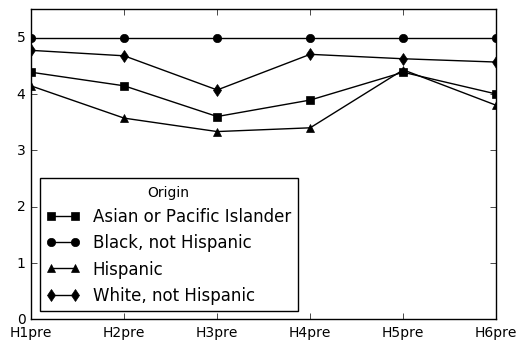

In [79]:
df_all = pd.read_excel("Hopper 2016 - analysis.xls")
#print(list(df_all))
df_all = df_all.replace('DK',np.nan)

pre_survey_race = df_all[['Origin','H1pre','H2pre','H3pre','H4pre','H5pre','H6pre']]
means = pre_survey_race.groupby('Origin').mean()
tp = means.transpose()

ax = tp.plot.line(style=['s-k','o-k','^-k','d-k'])


ax.set_ylim([0,5.5])


**Post-survey results** recreation of graph by Lori

,H1post,H2post,H3post,H4post,H5post,H6post
Origin,,,,,,
Asian or Pacific Islander,4.529412,4.393939,4.172414,4.285714,4.375000,4.09375
"Black, not Hispanic",5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
Hispanic,4.800000,4.800000,4.250000,4.500000,4.666667,4.20000
"White, not Hispanic",4.526316,4.315789,4.176471,4.176471,4.600000,4.50000


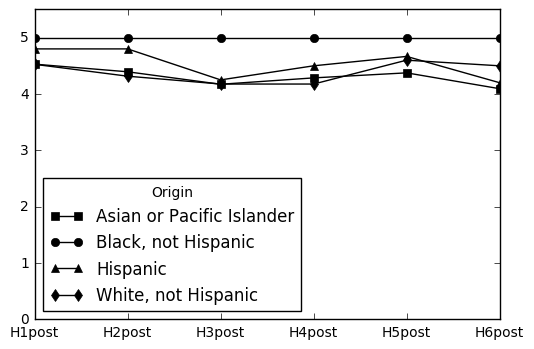

In [80]:
#print(list(df_all))
post_survey_race = df_all[['Origin','H1post','H2post','H3post','H4post','H5post','H6post']]
post_survey_race = post_survey_race.replace('DK',np.nan)
#pre_survey_racea
means = post_survey_race.groupby('Origin').mean()
means = means.replace(np.nan,5.0) # Handle the one NaN entry
tp = means.transpose()
ax = tp.plot.line(style=['s-k','o-k','^-k','d-k'])
ax.set_ylim([0,5.5])
means

In [81]:
post_survey_race['Origin'][post_survey_race['Origin'] == 'Hispanic'].count()

10

**Here are the comments from those with negative H6 changes**

In [82]:
df_matched['H6pre'] = pd.to_numeric(df_matched['H6pre'])
df_matched['H6post'] = pd.to_numeric(df_matched['H6post'])

df_matched['H4pre'] = pd.to_numeric(df_matched['H4pre'])
df_matched['H4post'] = pd.to_numeric(df_matched['H4post'])

df_matched['SA2'][df_matched['H6post']-df_matched['H6pre'] < 0]

7     Projects take a lot of work, try something small first                    
13    NaN                                                                       
23    I learned how to use HEAT for OpenStack                                   
26    NaN                                                                       
31    NaN                                                                       
35    If you don’t konw a lot you can still do a lot                            
36    NaN                                                                       
41    Collaboration makes for better projects                                   
45    NaN                                                                       
46    To make sure you have good documentation on any installation/set up steps.
Name: SA2, dtype: object

**Here are the comments fromm those with negative H5 changes**

In [83]:
df_matched['SA2'][df_matched['H5post']-df_matched['H5pre'] < 0]

1     Collaboratively/breaking up tasks and asking for help is important.                                                                                                    
5     That most people, including professors and professionals are as lost as me sometimes                                                                                   
22    Learned new terms, got introduction of a few new platforms which I’ll study now on my own. Good mentors and open stack organizers                                      
23    I learned how to use HEAT for OpenStack                                                                                                                                
26    NaN                                                                                                                                                                    
28    I learned what open source projects are and how to contribute to them. I also learned how humanitarian projects can very pos

In [84]:
pd.set_option('display.max_colwidth', oldwidth) # set the display width back to the default value

In [85]:
post_survey_diff_country = df_matched[['Country','H1Diff','H2Diff','H3Diff','H4Diff','H5Diff','H6Diff']]

In [86]:
post_survey_diff_country = post_survey_diff_country.replace('#VALUE!', np.nan)

In [87]:
clean_post_survey_diff = post_survey_diff_country.apply(pd.to_numeric, errors='ignore')

**Here are the counts of attendees by country**

In [88]:
clean_post_survey_diff.groupby('Country').count()

,H1Diff,H2Diff,H3Diff,H4Diff,H5Diff,H6Diff
Country,,,,,,
Bangladesh,1,1,1,1,1,1
Brazil,1,1,1,1,1,1
Canada,1,1,1,1,1,1
China,3,3,3,3,3,3
Germany,2,2,2,2,2,2
Hong Kong,1,1,1,1,1,1
India,13,12,9,10,12,12
Mexico,1,1,1,0,1,0
New Zealand,1,1,1,1,1,1


**Average change by country**

Here we calculate the average change from pre-to-post for each country. The countries with the largest number of attendees are India, USA and arguable China. I note that all categories for USA and China had an average negative change. For India, the changes were neutral or positive except for H6.

In [89]:
clean_post_survey_diff.groupby('Country').mean()

,H1Diff,H2Diff,H3Diff,H4Diff,H5Diff,H6Diff
Country,,,,,,
Bangladesh,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000
Brazil,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
Canada,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
China,-0.666667,0.000000,0.000000,0.000000,-0.333333,-0.333333
Germany,0.000000,0.000000,0.500000,0.000000,-0.500000,1.500000
Hong Kong,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
India,0.000000,0.250000,0.000000,0.200000,0.000000,-0.166667
Mexico,0.000000,0.000000,0.000000,NaN,-1.000000,NaN
New Zealand,0.000000,0.000000,0.000000,-5.000000,-5.000000,-4.000000


# Distribution of ranges of values of the Likert questions

I've plotted a histogram of the ranks given. I believe this answers Heidi's question 3

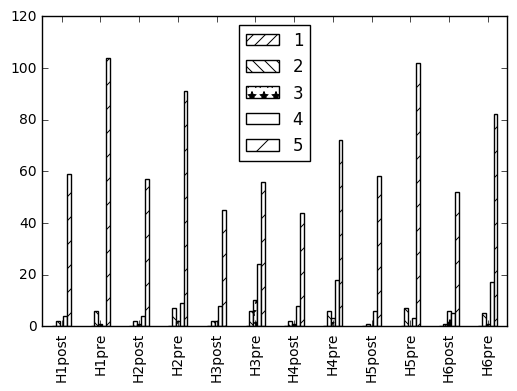

In [90]:
col_dict = dict()
for column in ['H1','H2','H3','H4','H5','H6']:
    heights,bins = np.histogram(df_all[column+"pre"].dropna(),bins=[-1,0,1,2,3,4,5])
    col_dict[column+"pre"] = heights
    heights,bins = np.histogram(df_all[column+"post"].dropna(),bins=[-1,0,1,2,3,4,5])
    col_dict[column+"post"] = heights


df = pd.DataFrame(col_dict)
#df['H2.1'].dropna().hist(bins=[0,1,2,3,4,5])
ax = df[1:6].transpose().plot(kind="bar",color="white")
for container, hatch in zip(ax.containers, ("//", "\\\\","*"," ","/")):
    for patch in container.patches:
        patch.set_hatch(hatch)
ax.legend(loc='upper center')
plt.show()

The post-results have fewer results that get washed out against the high number of 5's given in the pre-results. Below are the post-results only

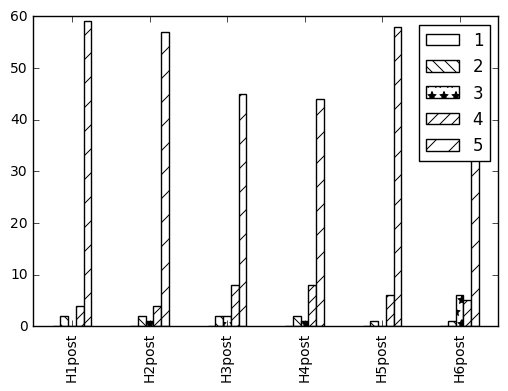

In [91]:
ax = df[['H1post','H2post','H3post','H4post','H5post','H6post']][1:6].transpose().plot(kind="bar",color="white")
for container, hatch in zip(ax.containers, (" ", "\\\\","*","//","/")):
    for patch in container.patches:
        patch.set_hatch(hatch)
ax.legend(loc='best')
plt.show()

# Mann-Whitney U test

I'm not very familiar with these tests, so I've done my best. I had to filter out "Black, not Hispanic" as there was only one respondent of that origin in the matched data. Also not that there are only 3 "Hispanic" respondents which may influence the result.


In [92]:
df_matched.groupby('Origin').count()

,ID,Country,Age,Gender,1st Major,2nd Major,Continuing,Why change,Prog. Ability,Months experience,...,H5post,H6post,SA2,Unnamed: 26,H1Diff,H2Diff,H3Diff,H4Diff,H5Diff,H6Diff
Origin,,,,,,,,,,,,,,,,,,,,,
Asian or Pacific Islander,25,25,25,24,25,10,24,2,25,20,...,23,23,12,0,25,25,25,25,25,25
"Black, not Hispanic",1,1,1,1,1,0,1,0,1,1,...,1,1,1,0,1,1,1,1,1,1
Hispanic,3,3,3,3,3,1,2,0,3,3,...,3,3,2,0,3,3,3,3,3,3
"White, not Hispanic",18,18,18,18,18,5,14,0,18,14,...,18,18,12,0,18,18,18,18,18,18


In [93]:
import scipy.stats as stats
df_reduce = df_matched[['Origin','H1pre','H1post','H2pre','H2post','H3pre','H3post','H4pre','H4post','H5pre','H5post','H6pre','H6post']][df_matched['Origin']!='Black, not Hispanic']

print("H1")
print(df_reduce.groupby('Origin').apply(lambda t: stats.mannwhitneyu(t.H1pre, t.H1post)))
print("\nH2")
print(df_reduce.groupby('Origin').apply(lambda t: stats.mannwhitneyu(t.H2pre, t.H2post)))
print("\nH3")
print(df_reduce.groupby('Origin').apply(lambda t: stats.mannwhitneyu(t.H3pre, t.H3post)))
print("\nH4")
print(df_reduce.groupby('Origin').apply(lambda t: stats.mannwhitneyu(t.H4pre, t.H4post)))
print("\nH5")
print(df_reduce.groupby('Origin').apply(lambda t: stats.mannwhitneyu(t.H5pre, t.H5post)))
print("\nH6")
print(df_reduce.groupby('Origin').apply(lambda t: stats.mannwhitneyu(t.H6pre, t.H6post)))


H1
Origin
Asian or Pacific Islander    (285.0, 0.257352051018) 
Hispanic                     (4.5, 0.396073695898)   
White, not Hispanic          (127.0, 0.0663713800146)
dtype: object

H2
Origin
Asian or Pacific Islander    (275.5, 0.208628927509) 
Hispanic                     (4.5, 0.396073695898)   
White, not Hispanic          (124.5, 0.0798567779064)
dtype: object

H3
Origin
Asian or Pacific Islander    (268.0, 0.188630119646)
Hispanic                     (4.0, 0.5)             
White, not Hispanic          (161.0, 0.493146023086)
dtype: object

H4
Origin
Asian or Pacific Islander    (231.5, 0.0503017846292)
Hispanic                     (3.5, 0.412389047541)   
White, not Hispanic          (135.0, 0.173267651118) 
dtype: object

H5
Origin
Asian or Pacific Islander    (281.5, 0.244203406965)
Hispanic                     (3.0, 0.252492537547)  
White, not Hispanic          (136.5, 0.147618517403)
dtype: object

H6
Origin
Asian or Pacific Islander    (308.0, 0.466400912448)
Hispanic